### Plan
- start with S08 and S09, who should have consistent behavior and ephys data
- explore behavior data using pandas

#### bonus on behavior data
- repeat for all subjects
- merge dataframes, adding a column for subject id
- read documentation and understand each variable
- make first draft presentation for low-tech demo day

#### archive
- explore neural data using mne-python

## Explore behavior data using pandas

In [7]:
import pandas as pd
beh_dir = '../data/decision-making/data/data_behav'

# os.listdir(beh_dir)

## S08 and S09

In [8]:
os.listdir(beh_dir)

['gamble.data.s01.csv',
 'gamble.data.s02.csv',
 'gamble.data.s03.csv',
 'gamble.data.s04.csv',
 'gamble.data.s05.csv',
 'gamble.data.s06.csv',
 'gamble.data.s07.csv',
 'gamble.data.s08.csv',
 'gamble.data.s09.csv',
 'gamble.data.s10.csv',
 'gamble_choices.csv',
 'Icon\r']

In [12]:
beh8_df = pd.read_csv(os.path.join(beh_dir,'gamble.data.s08.csv'))
beh9_df = pd.read_csv(os.path.join(beh_dir,'gamble.data.s09.csv'))

print(np.sum(beh8_df['choice.class']=='Timeout'))
print(np.sum(beh9_df['choice.class']=='Timeout'))

0
0


In [13]:
beh8_df.head()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome
0,1,331.856,332.653,334.200,334.216,334.231,Gamble,Left,Win
1,2,335.263,336.060,337.216,337.247,337.263,Safebet,Right,WouldHaveWon
2,3,338.278,339.075,340.450,340.466,340.481,Safebet,Left,WouldHaveWon
3,4,341.513,342.310,344.247,344.278,344.294,Gamble,Left,Win
4,5,345.310,346.106,347.497,347.513,347.544,Safebet,Right,WouldHaveLost


In [14]:
beh8_df.tail()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome
195,196,1029.169,1029.966,1032.153,1032.185,1032.200,Gamble,Left,Win
196,197,1033.216,1034.013,1034.997,1035.028,1035.044,Gamble,Left,Win
197,198,1036.060,1036.856,1038.700,1038.731,1038.747,Gamble,Left,Win
198,199,1039.763,1040.560,1041.544,1041.560,1041.591,Gamble,Right,Win
199,200,1042.606,1043.403,1044.403,1044.419,1044.450,Safebet,Left,WouldHaveLost


In [15]:
beh9_df.head()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome
0,1,674.234,674.928,675.900,675.921,675.942,Gamble,Left,Win
1,2,676.961,677.654,679.357,679.378,679.400,Gamble,Left,Win
2,3,680.418,681.112,682.716,682.737,682.759,Safebet,Left,WouldHaveWon
3,4,683.778,684.471,685.378,685.400,685.422,Gamble,Left,Win
4,5,686.440,687.134,688.746,688.767,688.789,Safebet,Right,WouldHaveLost


In [16]:
beh9_df.tail()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time,choice.class,choice.location,outcome
195,196,1278.820,1279.513,1281.515,1281.536,1281.557,Safebet,Left,WouldHaveWon
196,197,1282.575,1283.269,1284.334,1284.355,1284.377,Gamble,Left,Win
197,198,1285.395,1286.089,1287.556,1287.578,1287.599,Gamble,Left,Win
198,199,1288.617,1289.310,1290.212,1290.233,1290.255,Gamble,Right,Win
199,200,1291.273,1291.968,1293.367,1293.388,1293.411,Safebet,Left,WouldHaveLost


### Observations based on this and the documentation
TIMES
- newround.time seems to be the event that game_events_hg is time-locked to (1 second in)
- not clear what choice.time is...
- buttonpress.time is the time when the subject pressed the button, indicating their decision: the event that buttonpress_events_hg is locked to (1 second in)
- conf.time: subject choice is highlighted on the screen (their choice is confirmed, we're waiting for feedback)
- reveal.time: gamble outcome is revealed on the screen 



In [17]:
beh8_df.describe()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,100.500000,700.281300,701.078135,702.789055,702.808415,702.82963
std,57.879185,206.890447,206.890449,206.656598,206.657165,206.65740
min,1.000000,331.856000,332.653000,334.200000,334.216000,334.23100
25%,50.750000,524.727750,525.524750,527.481500,527.496750,527.52475
50%,100.500000,706.935000,707.731000,709.950000,709.974000,709.99700
75%,150.250000,879.024250,879.821250,881.102500,881.118500,881.13375
max,200.000000,1042.606000,1043.403000,1044.403000,1044.419000,1044.45000


In [20]:
beh9_df.describe()

,round,newround.time,choice.time,buttonpress.time,conf.time,reveal.time
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,983.759765,984.453570,985.799030,985.820350,985.842395
std,57.879185,179.377455,179.377397,179.360608,179.360527,179.360511
min,1.000000,674.234000,674.928000,675.900000,675.921000,675.942000
25%,50.750000,830.892000,831.585750,832.833750,832.855750,832.878250
50%,100.500000,984.585000,985.278000,986.182000,986.203000,986.225500
75%,150.250000,1137.350000,1138.043250,1139.792750,1139.814750,1139.836000
max,200.000000,1291.273000,1291.968000,1293.367000,1293.388000,1293.411000


In [21]:
beh8_df['outcome'].unique()

array(['Win', 'WouldHaveWon', 'WouldHaveLost', 'Loss'], dtype=object)

In [22]:
beh8_df['choice.class'].unique()

array(['Gamble', 'Safebet'], dtype=object)

In [23]:
beh9_df['outcome'].unique()

array(['Win', 'WouldHaveWon', 'WouldHaveLost', 'Loss'], dtype=object)

In [24]:
beh9_df['choice.class'].unique()

array(['Gamble', 'Safebet'], dtype=object)

## Explore neural data using mne-python

### Based on documentation, sfreq = 1000 (1 kHz)

In [27]:
sfreq = 1000

neur_dir = '../data/decision-making/data/data_ephys'

# os.listdir(neur_dir)

from scipy.io import loadmat

neur8 = loadmat(os.path.join(neur_dir, 's08_ofc_hg_events.mat'))
neur9 = loadmat(os.path.join(neur_dir, 's09_ofc_hg_events.mat'))

print(type(neur8))
print(type(neur9))

<class 'dict'>
<class 'dict'>


In [31]:
print(neur8.keys())
print()
print(neur9.keys())

dict_keys(['__header__', '__version__', '__globals__', 'buttonpress_events_hg', 'buttonpress_window_events_hg', 'game_events_hg', 'game_window_events_hg'])

dict_keys(['__header__', '__version__', '__globals__', 'buttonpress_events_hg', 'buttonpress_window_events_hg', 'game_events_hg', 'game_window_events_hg'])


### Button-press events HG
- -1 to 2 seconds relative to button press (per documentation)

In [32]:
neur8['buttonpress_events_hg'].shape

(200, 3001, 10)

In [33]:
neur9['buttonpress_events_hg'].shape

(200, 3001, 19)

In [34]:
# cool, same format except subject 9 has 19 electrodes

In [35]:
# 50 ms increments version of buttonpress_events_hg --> don't use this
# neur8['buttonpress_window_events_hg'].shape

### Game events HG
- -1 to 2 seconds relative to game presentation event (per documentation)

In [36]:
neur8['game_events_hg'].shape

(200, 3001, 10)

In [37]:
neur9['game_events_hg'].shape

(200, 3001, 19)

In [38]:
# 50 ms increments version of game_events_hg --> don't use this
# neur8['game_window_events_hg'].shape

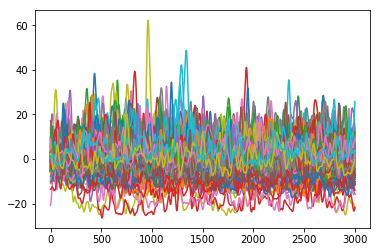

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(neur8['game_events_hg'][:,:,7].T)
# plt.axvline(1000)
pass

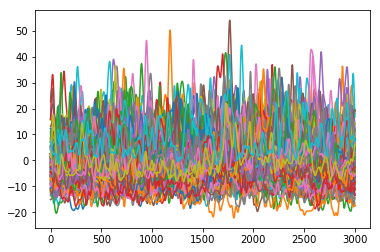

In [40]:
plt.plot(neur9['buttonpress_events_hg'][:,:,7].T)
# plt.axvline(1000)
pass

### What do the dimensions mean? 200 x 57 x 10?
- number trials = 200
- number time points = 3001
- number electrodes = 10